In [132]:
from sklearn.datasets import load_iris

In [133]:
iris_data = load_iris()

In [134]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [135]:
iris_label = iris_data.target # y값,,,?

In [136]:
iris_data.feature_names # numpy 형식

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [137]:
import pandas as pd
iris_df = pd.DataFrame(data=iris_data.data, columns = iris_data.feature_names)

* feature engineering (==전처리)

In [138]:
iris_df['label'] = iris_data.target

In [139]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


* SupervisedLearning

In [140]:
# 7 : 3, 8 : 2 (train data, test data) , 데이터 양 적으면 훈련에 쏟아야함

iris_df.shape[0] * 0.8

120.0

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
y = iris_df.pop("label")

In [143]:
X_train, X_test, Y_train, Y_test = train_test_split(iris_df, y, test_size=0.2, random_state=42)

In [144]:
a, b =train_test_split(iris_df, test_size=0.2, random_state=42)

In [145]:
a.shape # train data

(120, 4)

In [146]:
b.shape # test data

(30, 4)

In [147]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [148]:
from sklearn.tree import DecisionTreeClassifier

In [149]:
dt_clf = DecisionTreeClassifier(random_state=11)

In [150]:
dt_clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=11)

In [151]:
dt_clf.predict(X_test) # 예상되는 y값

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [152]:
# 채점
from sklearn.metrics import accuracy_score 

In [153]:
# 점수 띠롱띠롱
accuracy_score(Y_test, dt_clf.predict(X_test))

1.0

In [154]:
# 검정데이터 처리하는 기능
from sklearn.preprocessing import LabelEncoder

In [155]:
encoder  = LabelEncoder()

In [156]:
# 학습
encoder.fit(['적음', '보통', '많음'])

LabelEncoder()

In [157]:
# 변환
encoder.transform(['적음', '보통', '많음'])

array([2, 1, 0])

In [158]:
from sklearn.preprocessing import OneHotEncoder

In [159]:
one_encoder = OneHotEncoder()

In [160]:
import numpy as np

In [161]:
np.arange(12).reshape(-1,3)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [162]:
one_encoder.fit(np.array(['적음', '보통', '많음']).reshape(-1,1))

OneHotEncoder()

In [163]:
one_encoder.transform(np.array(['적음', '보통', '많음']).reshape(-1,1)).toarray()

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [165]:
titanic_df = pd.read_csv('./titanic_data/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [166]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [167]:
# 결측치 처리
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

In [168]:
titanic_df['Cabin'].fillna('N', inplace=True)

In [169]:
titanic_df['Embarked'].fillna('N', inplace=True)

In [170]:
# 전체 결측치 합
titanic_df.isnull().sum().sum()

0

In [171]:
titanic_df['Cabin'].unique().size

148

In [172]:
titanic_df['Cabin'].value_counts()

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [173]:
# Cabin Columns의 앞 첫자리가 중요하다고 생각하여 앞 값만 추출
titanic_df['Cabin'].apply(lambda x : x[0])
#titanic_df['Cabin'].str[0]

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [174]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

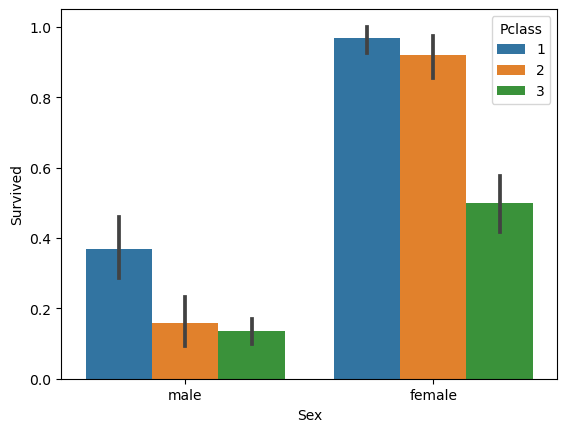

In [175]:
sns.barplot(data=titanic_df, x='Sex', y='Survived', hue='Pclass')

In [176]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
   
    return cat


In [177]:
titanic_df['Age_cate'] = titanic_df['Age'].apply(get_category)

<AxesSubplot:xlabel='Age_cate', ylabel='Survived'>

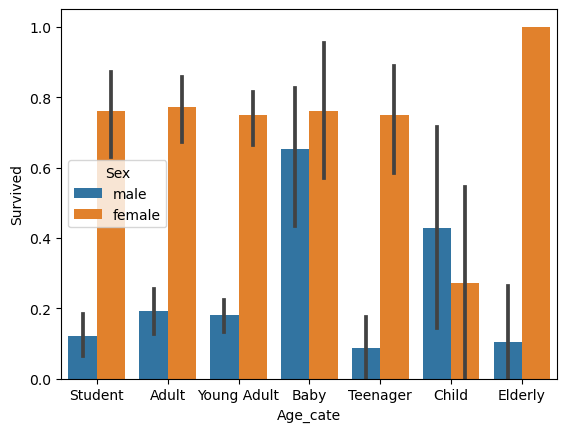

In [178]:
sns.barplot(data=titanic_df, x='Age_cate', y='Survived', hue='Sex')

In [196]:
from sklearn import preprocessing

In [197]:
features = ['Cabin', 'Sex', 'Embarked']
for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(titanic_df[feature])
    titanic_df[feature] = le.transform(titanic_df[feature])


In [198]:
# 분리시켜 왜냐면 그냥 넘기면 두개로 넘기는 거니까, 4개로 만들어주기 위해서 (train,test xy)
df_y = titanic_df.pop('Survived')

KeyError: 'Survived'

In [204]:
titanic_df2 = titanic_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']].copy()

In [205]:
X_train, X_test, y_train, y_test = train_test_split(titanic_df2, df_y, test_size=0.2, random_state=11)

In [206]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [207]:
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

In [208]:
# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))


# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))


# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))


DecisionTreeClassifier 정확도: 0.8045
RandomForestClassifier 정확도:0.8380
LogisticRegression 정확도: 0.8492
